In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv("Cust_Churn_Telco.csv")

<AxesSubplot:>

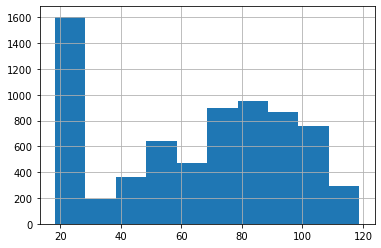

In [2]:
# we need to plot our distributions
df['MonthlyCharges'].hist()

<AxesSubplot:>

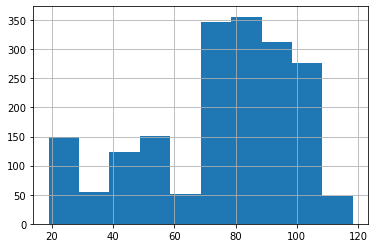

In [3]:
churn_sample = df[df.Churn=='Yes'].MonthlyCharges

churn_sample.hist()

In [4]:
df.shape

(7043, 21)

$H_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers

In [5]:
#set alpha
alpha = .05

In [6]:
df.Churn.value_counts()  #this is to verify assumptions

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
churn_sample = df[df.Churn == 'Yes'].MonthlyCharges
churn_sample

#this is our "array like object"

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

In [9]:
overall_mean = df.MonthlyCharges.mean()
overall_mean

#this is the actual float value

64.76169246059922

In [10]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
print(t, p, p/2, alpha)

16.965403080505645 3.7406392993841064e-60 1.8703196496920532e-60 0.05


In [11]:
# is p/2 < alpha?  Yes, this is true.
print ('is p-value significant?', p/2 < alpha)
print ("is t_statistic > 0", t > 0)

is p-value significant? True
is t_statistic > 0 True


In [12]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [13]:
#We are basically saying that p/2 is < alpha AND t > 0, so we are rejecting null.  This is a True Positive.

In [14]:
#2 second example now:

t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p

(16.965403080505645, 3.7406392993841064e-60)

In [15]:
# is p-value less than alpha?
p < alpha

True

In [16]:
#This means that The mean monthly charges of churned customers is significantly different.

In [17]:
#example 3: 
t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p

(16.965403080505645, 3.7406392993841064e-60)

In [19]:
#Is 1/2 of p < alpha AND t-stat <0?
print(t < 0)
print(p/2 < alpha)

False
True


In [20]:
#we fail to reject the null hypothesis.

In [21]:
# New Example

In [22]:
churn_sample = df[df.Churn == 'Yes'].MonthlyCharges
churn_sample

#this gives us an array like object (a series)

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

<AxesSubplot:>

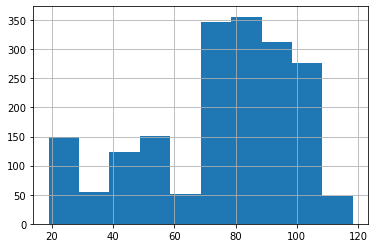

In [23]:
churn_sample.hist()

<AxesSubplot:>

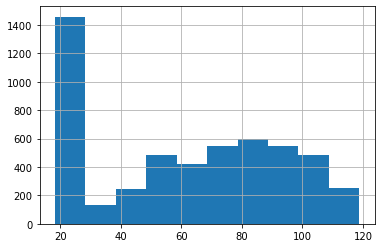

In [24]:
no_churn_sample = df[df.Churn=='No'].MonthlyCharges

no_churn_sample.hist()

In [25]:
#set alpha
alpha = .05

In [26]:
print(churn_sample.var())
print(no_churn_sample.var())

608.4141833954304
966.7527670734287


In [27]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var = False)
t, p/2

(18.407526676414673, 4.2962246657737696e-73)